# Importing

In [1]:
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing, model_selection
from sklearn.linear_model import LinearRegression

Use to plot the data

In [2]:
import matplotlib.pyplot as plt


Use to make data look better

In [3]:
from matplotlib import style

Use to specify the style of the plot

In [4]:
style.use('ggplot')

In [5]:
import joblib

# Selecting Files

In [6]:
file_path = r'D:\Important Files\Repositories\Machine-Learning-Project-related\Project 2\Data\600873_metadata_utf8.csv'
stock_df = pd.read_csv(file_path)

# Calculating nessasary indexes
and add them to the stock_df dataframe

In [7]:
stock_df['HL_PCT'] = (stock_df['Highest Price'] - stock_df['Closing Price']) / stock_df['Closing Price'] * 100.0
stock_df['PCT_change'] = (stock_df['Closing Price'] - stock_df['Opening Price']) / stock_df['Opening Price'] * 100.0
display(stock_df.head())

,Stock Code,Stock Name,Trading Time,Opening Price,Highest Price,Lowest Price,Closing Price,Price Change,Price Change Percentage,Trading Volume,Trading Amount,HL_PCT,PCT_change
0,600873,????,2/17/1995,0.83,0.95,0.83,0.90,--,--,"11,954,900","69,198,000",5.555556,8.433735
1,600873,????,2/20/1995,0.88,0.90,0.86,0.87,-0.0287,-3.1825,"3,859,200","22,417,000",3.448276,-1.136364
2,600873,????,2/21/1995,0.87,0.89,0.85,0.89,0.018,2.0616,"2,091,500","12,031,000",0.000000,2.298851
3,600873,????,2/22/1995,0.89,1.32,0.88,1.26,0.3698,41.4993,"16,299,000","118,230,000",4.761905,41.573034
4,600873,????,2/23/1995,1.21,1.51,1.18,1.51,0.2531,20.073,"18,309,200","158,378,000",0.000000,24.793388


# Change the trading time into pandas datetime data type.

In [8]:
stock_df['Trading Time'] = pd.to_datetime(stock_df['Trading Time'])
print(stock_df['Trading Time'].dtype)

datetime64[ns]


# Choose data columns we want and drop the rest

In [9]:
stock_df = stock_df[['Trading Time', 'Closing Price', 'HL_PCT', 'PCT_change', 'Trading Volume']]
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,1995-02-17,0.90,5.555556,8.433735,"11,954,900"
1,1995-02-20,0.87,3.448276,-1.136364,"3,859,200"
2,1995-02-21,0.89,0.000000,2.298851,"2,091,500"
3,1995-02-22,1.26,4.761905,41.573034,"16,299,000"
4,1995-02-23,1.51,0.000000,24.793388,"18,309,200"


Remove commas and convert to numeric, since in metadata the trading volume contain commas

In [10]:
stock_df['Trading Volume'] = stock_df['Trading Volume'].replace({',': ''}, regex=True).astype(float)
display(stock_df.head())

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume
0,1995-02-17,0.90,5.555556,8.433735,11954900.0
1,1995-02-20,0.87,3.448276,-1.136364,3859200.0
2,1995-02-21,0.89,0.000000,2.298851,2091500.0
3,1995-02-22,1.26,4.761905,41.573034,16299000.0
4,1995-02-23,1.51,0.000000,24.793388,18309200.0


# Setting up a name for target column attribute

In [11]:
forecast_col = 'Closing Price'

# Tell the code how many days ahead will it be forcasting

In [12]:
forecast_out = int(math.ceil(0.001*len(stock_df)))
print(len(stock_df), forecast_out)
# The 0.001 percentage of the data is 7 days, so we are predicting the closing price for the 7 days later

6895 7


# Managing the answers
The answer is the closing price 7(forcast_out) days later.

We then shift the data's targeted attributes up for 7 days and assign them into the 'Label' column.

In [13]:
stock_df['Label'] = stock_df[forecast_col].shift(-forecast_out)
print(forecast_out)
display(stock_df.tail(10))

7


,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
6885,2025-02-05,9.81,2.854230,-2.485089,18847731.0,9.92
6886,2025-02-06,9.91,0.201816,0.813835,17526552.0,9.53
6887,2025-02-07,9.92,0.806452,0.000000,19920528.0,9.56
6888,2025-02-10,9.89,1.921132,-0.302419,21891171.0,NaN
6889,2025-02-11,10.08,0.297619,1.818182,23935584.0,NaN
6890,2025-02-12,10.00,1.300000,-0.793651,15858940.0,NaN
6891,2025-02-13,9.90,1.212121,-1.000000,18667000.0,NaN
6892,2025-02-14,9.92,0.504032,-0.301508,11836145.0,NaN
6893,2025-02-17,9.53,2.413431,-2.356557,59141487.0,NaN
6894,2025-02-18,9.56,1.464435,0.631579,23726945.0,NaN


# Spliting and Managing the features

Split the dataframe where X is the features and y is the answer

1. Remove answer(label) from X which is the features
2. Scale the features.
3. Store remoced answers into y
4. drop NaN values created by the shifting, since shift up will create a 7 days of label section NaN values, so make sure to drop these when you create 'Label' column. 
5. By doing these following two blocks, you split the original data into 4 parts: 

   1. (original days - forcast_out days)'s data without answers: `X`
   2. (original days - forcast_out days)'s answers without data: `y`
   3. (forcast_out days)'s data without answers: `X_lately`
stock_df.dropna(inplace = True)
   1. (forcast_out days)'s answers which are NaN values because of the shifting, and is removed by the `stock_df.dropna(inplace = True)` line following.

In [14]:
dates = stock_df['Trading Time'][:-forecast_out]
dates_lately = stock_df['Trading Time'][-forecast_out:]

display(dates)
display(dates_lately)

0      1995-02-17
1      1995-02-20
2      1995-02-21
3      1995-02-22
4      1995-02-23
          ...    
6883   2025-01-24
6884   2025-01-27
6885   2025-02-05
6886   2025-02-06
6887   2025-02-07
Name: Trading Time, Length: 6888, dtype: datetime64[ns]

6888   2025-02-10
6889   2025-02-11
6890   2025-02-12
6891   2025-02-13
6892   2025-02-14
6893   2025-02-17
6894   2025-02-18
Name: Trading Time, dtype: datetime64[ns]

In [15]:
X = np.array(stock_df.drop(['Label', 'Trading Time'], axis = 1))
X = preprocessing.scale(X)
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

# display(X)
# display(X_lately)
# display(stock_df.tail(10))

## Removing NaN values caused by the shifting

In [16]:
stock_df.dropna(inplace = True)

In [17]:
y = np.array(stock_df['Label'])
display(y)
display(stock_df.tail(10))

array([1.23, 1.25, 1.24, ..., 9.92, 9.53, 9.56], shape=(6888,))

,Trading Time,Closing Price,HL_PCT,PCT_change,Trading Volume,Label
6878,2025-01-17,9.82,0.712831,0.511771,17211802.0,9.81
6879,2025-01-20,9.84,1.626016,-0.505561,19425301.0,9.91
6880,2025-01-21,9.72,1.748971,-1.419878,17641072.0,9.92
6881,2025-01-22,9.78,0.204499,1.033058,15627117.0,9.89
6882,2025-01-23,9.76,1.639344,-0.712106,11882532.0,10.08
6883,2025-01-24,9.83,0.305188,0.820513,15612997.0,10.00
6884,2025-01-27,10.03,0.897308,1.930894,19881690.0,9.90
6885,2025-02-05,9.81,2.854230,-2.485089,18847731.0,9.92
6886,2025-02-06,9.91,0.201816,0.813835,17526552.0,9.53
6887,2025-02-07,9.92,0.806452,0.000000,19920528.0,9.56


You can see they have the same shape in axis = 1.

# Split data into traning and testing.

Set shuffle = False because by default it will shuffle and this will mess up the date relationships which is something we want

In [18]:
X_train, X_test, y_train, y_test, dates_train, dates_test = model_selection.train_test_split(X, y, dates, test_size = 0.2)

# Training the model(classifier)
`n_jobs = -1` means to run using as many threads as possible, make it faster.

In [19]:
clf = LinearRegression(n_jobs = -1)
clf.fit(X_train, y_train)
accuracy = clf.score(X_test, y_test)

# Saving the model
And load the model:

In [20]:
joblib.dump(clf, 'stock_prediction_model.pkl')
loaded_model = joblib.load('stock_prediction_model.pkl')

Store the loaded model into clf for education purposes

In [21]:
clf = loaded_model

# Getting the prediction for the shifted days that has no answers.
And print the result:

In [22]:
forecast_set = clf.predict(X_lately)
print("Forecast result: " + str(forecast_set) + "\n" + "With the accuracy of: " + str(accuracy) + "\n" + "Forecast out of " + str(forecast_out) + " days.")

Forecast result: [9.74840563 9.7324361  9.79861398 9.99141584 9.78414439 9.87790674
 9.8888596 ]
With the accuracy of: 0.9865878997419362
Forecast out of 7 days.


# Merging all sections together for matplot lib

1. dates_train
2. dates_test
3. dates_lately

This being the X axis

and


1. y_train
2. y_test
3. forcast out

This being the Y axis

In [23]:
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)
forecast_set = forecast_set.reshape(-1, 1)

dates_train = np.array(dates_train).reshape(-1, 1)
dates_test  = np.array(dates_test).reshape(-1, 1)
dates_lately = np.array(dates_lately).reshape(-1, 1)

all_dates = np.vstack((dates_train, dates_test, dates_lately)).flatten()
all_targets = np.vstack((y_train, y_test, forecast_set)).flatten()

df_combined = pd.DataFrame({
    "Date": all_dates,
    "Closing Price": all_targets
})

df_combined.set_index('Date', inplace = True)
df_combined.sort_values(by = 'Date', inplace = True)
display(df_combined)


,Closing Price
Date,
1995-02-17,1.230000
1995-02-20,1.250000
1995-02-21,1.240000
1995-02-22,1.350000
1995-02-23,1.600000
...,...
2025-02-12,9.798614
2025-02-13,9.991416
2025-02-14,9.784144


## Using matplotlib to Show the graph

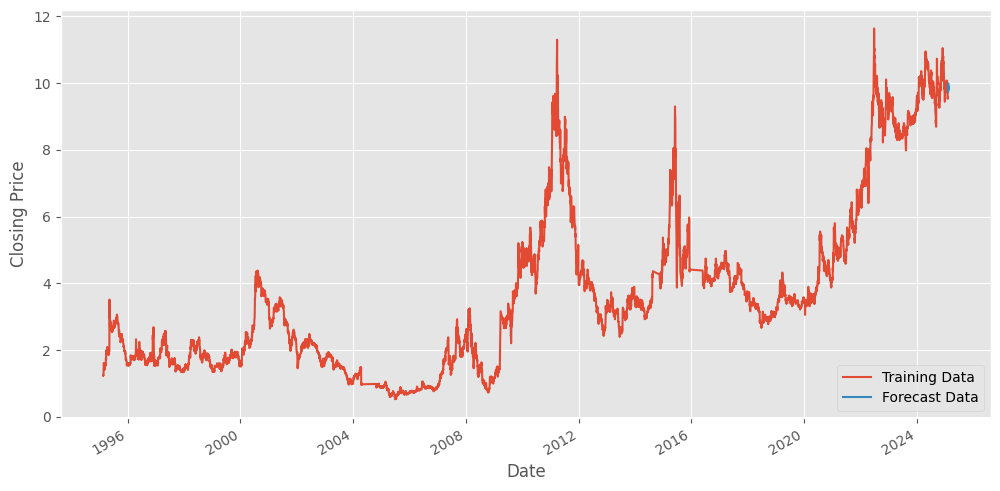

In [24]:
plt.figure(figsize = (12, 6))
df_combined['Closing Price'][:-forecast_out].plot(label = 'Training Data')
df_combined['Closing Price'][-forecast_out:].plot(label = 'Forecast Data')
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

In [27]:
df_combined.info()
df_combined.columns
df_combined.describe()
df_combined.sort_values(by = 'Closing Price', ascending = False)


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6895 entries, 1995-02-17 to 2025-02-18
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Closing Price  6895 non-null   float64
dtypes: float64(1)
memory usage: 107.7 KB


,Closing Price
Date,
2022-06-28,11.64
2022-06-29,11.55
2011-03-29,11.30
2024-12-03,11.05
2022-07-01,11.03
...,...
2005-07-01,0.54
2005-07-12,0.54
2005-07-07,0.53
